# Exploratory Data Analysis(EDA)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Khunmi/test/blob/master/_portfolio/data_investigation.ipynb)

<!-- ## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#depedencies">Dependencies and Data</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a> -->
## Introduction

This project will be investigating the 'No-show appoinments' dataset for hospital appointment attendance status and other characteristics for 100,000 patients in Brazil, South America.

In particular, I will be exploring trends concerning attendance rates between male and females, factors that may or may not have influenced attendance such as SMS prompts, welfare enrolments and Handicap level, average age of attendees and non-attendees.
### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.. 


### Question(s) for Analysis
- What age ranges are more likely to honor appointments as well as the ages that most likely wouldn't?

- Does SMS prompts play an important role in appoinment showup rates?

- What percentage of males and females are enrolled in welfare programs?


<!-- <a id='depedencies'></a> -->
### Dependencies and Data

The following code blocks contain import for dependencies used in this project including the CSV file.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
#This cell loads in all packages used throughout the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')

### Data Properties

The following cells cotains statements used to check the various properties of the dataframe such as;

- Column names
- Data Types in each column
- Number of Rows and Colunms
- Columns with missing values

A quick description command on the dataframe will also help preview trends at a glance.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [2]:
#The number if rows and columns are given below to give an idea on how large the dataset is.
df.shape

(110527, 14)

In [3]:
#information about the dataframe such as data types in each column is detailed below.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


A quick glance at the dataset description is clearly highlighting that there is at least one occurence of an invalid  age value(-1.0) in the age column. This will be treated in the Data cleaning section.

<!-- <a id='wrangling'></a> -->
## Data Wrangling

There will be inspection of the dataset in this section. Checks for duplicates and null values
are necessary checks in order to determine the amount and type of cleaning and conversions that would be needed.

This section will also dive into data cleaning processes after proper checks. 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [5]:
#The first ten rows in the dataet is queries to give and overview on what the data looks like.
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


 A view of what the first ten rows in our dataset looks like to give an idea of what is contained within the dataset.

In [6]:
#this statement is used to get the total number of duplicated rows: it appears we have none 

df.duplicated().sum()

0

Total number of duplicate rows in our data is computed in the cell above as a rule for data inspection.

In [7]:
# the '.info()' gives necessary information to determine if any column has null values present.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


A quick look at the information attributes for the entire dataframe.


### Data Cleaning

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 

In [8]:
#Dropping columns that wouldn't be of use in my analysis

df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

Following the data preview done in the previous section, it appears that there are some columns that wouldn't be needed as regards the purview of my analysis such as the 'PatientId' and 'AppointmentID' columns . Dropping them will enable me focus on the sections that are of use to me.

In [9]:
#statement converting all dataframe column to lowercase for easy access

df.columns= df.columns.str.lower()

A good practice is to convert all column names to lower case because it is somewhat stressfull to always check the column name everytime you intend to access them during analysis. 

In [10]:
#Renaming of columns and making the changes permanent with the 'inplace' command

df.rename(columns = {'no-show': 'no_show','hipertension':'hypertension','handcap':'handicap'}, inplace = True)

After observing the cloumn names in the previous section, column 'no-show' seems to have a python inbuilt operator as part of its naming. It is of great importance to rename this column so as to avoid conflicts and errors when referencing column 'no-show'.

Column 'hipertension' and 'handcap' are spelled wrongly so I decided to make a correction to 'hypertension' and 'handicap' respectively.

In [11]:
#correcting data entry error by renaming 'Yes' to 'no' and renaming 'No' to 'yes'

df['no_show'].replace({'No' : 'yes'}, inplace = True)
df['no_show'].replace({'Yes' : 'no'}, inplace = True)

C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\1216298388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_show'].replace({'No' : 'yes'}, inplace = True)


Documentation states there was an error in the no_show column where 'Yes' was recorded as 'No' and 'No' was entered as 'Yes'.
This cell renames the values of the no_show column

In [12]:
#Converting Date type data in the dataframe
def date_convert():
    df['scheduledday'] = pd.to_datetime(df['scheduledday'])
    df['appointmentday'] = pd.to_datetime(df['appointmentday'])
    return df

After data inspection, it was obesrved that the 'scheduledday' and 'appoinmentday' columns are dates but their data types do not correspond, they appear to be strings which should not be so. Dates are to be treated as datetime formats for smooth analysis process.

In [13]:
#checking datafarme properties for confirmation
date_convert()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


This cell checks to confirm that the date conversions were successful.

In [14]:
#Querying invalid age entry from the dataframe

invalid_age = df[(df.age < 1)]
invalid_age.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,3540.000000,3540.000000,3540.0,3540.0,3540.0,3540.000000,3540.000000
mean,-0.000282,0.014689,0.0,0.0,0.0,0.000282,0.253390
std,0.016807,0.120323,0.0,0.0,0.0,0.016807,0.435014
min,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000
max,0.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


- Taking a look at the category of data that has invalid age entry as spoted while inspecting the data properties (see section <a href="#depedencies">Dependencies and Data</a>).

- As seen, we have a total of 3540 rows with invalid age input of less than 1. A further inspection of this category is neccessary inorder to make a decision on whether to delete the entries from the dataset or fill the wrong values.

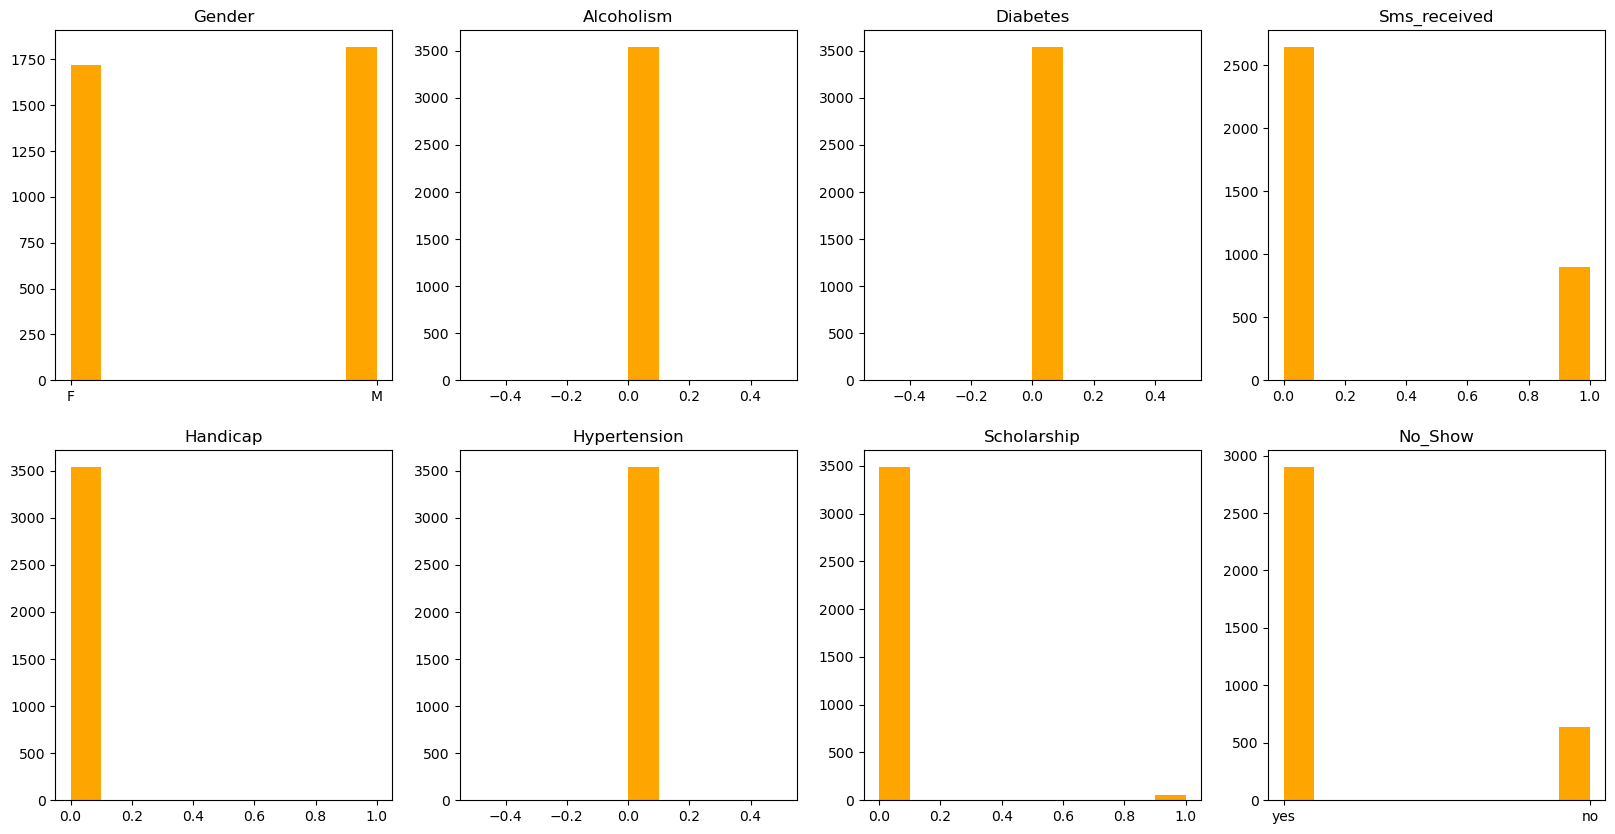

In [15]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
explode = (0.1, 0)
colors = 'orange'

ax[0,0].hist(invalid_age.gender, color = colors)
ax[0,0].set_title('Gender')
ax[1,0].hist(invalid_age.handicap, color = colors)
ax[1,0].set_title('Handicap')
ax[1,1].hist(invalid_age.hypertension, color = colors)
ax[1,1].set_title('Hypertension')
ax[1,2].hist(invalid_age.scholarship, color = colors)
ax[1,2].set_title('Scholarship')
ax[0,1].hist(invalid_age.alcoholism, color = colors)
ax[0,1].set_title('Alcoholism')
ax[0,2].hist(invalid_age.diabetes, color = colors)
ax[0,2].set_title('Diabetes')
ax[0,3].hist(invalid_age.sms_received, color = colors)
ax[0,3].set_title('Sms_received')
ax[1,3].hist(invalid_age.no_show, color = colors)
ax[1,3].set_title('No_Show');

This cell contains an overview plot of other characteristics of the group with ages less than 1. These plots give enough details to compare with the general characteristics of our entire dataframe. I am looking to inspect if there are any peculiarities about this age group by comparing their characteristics with that of the entire datafarme.

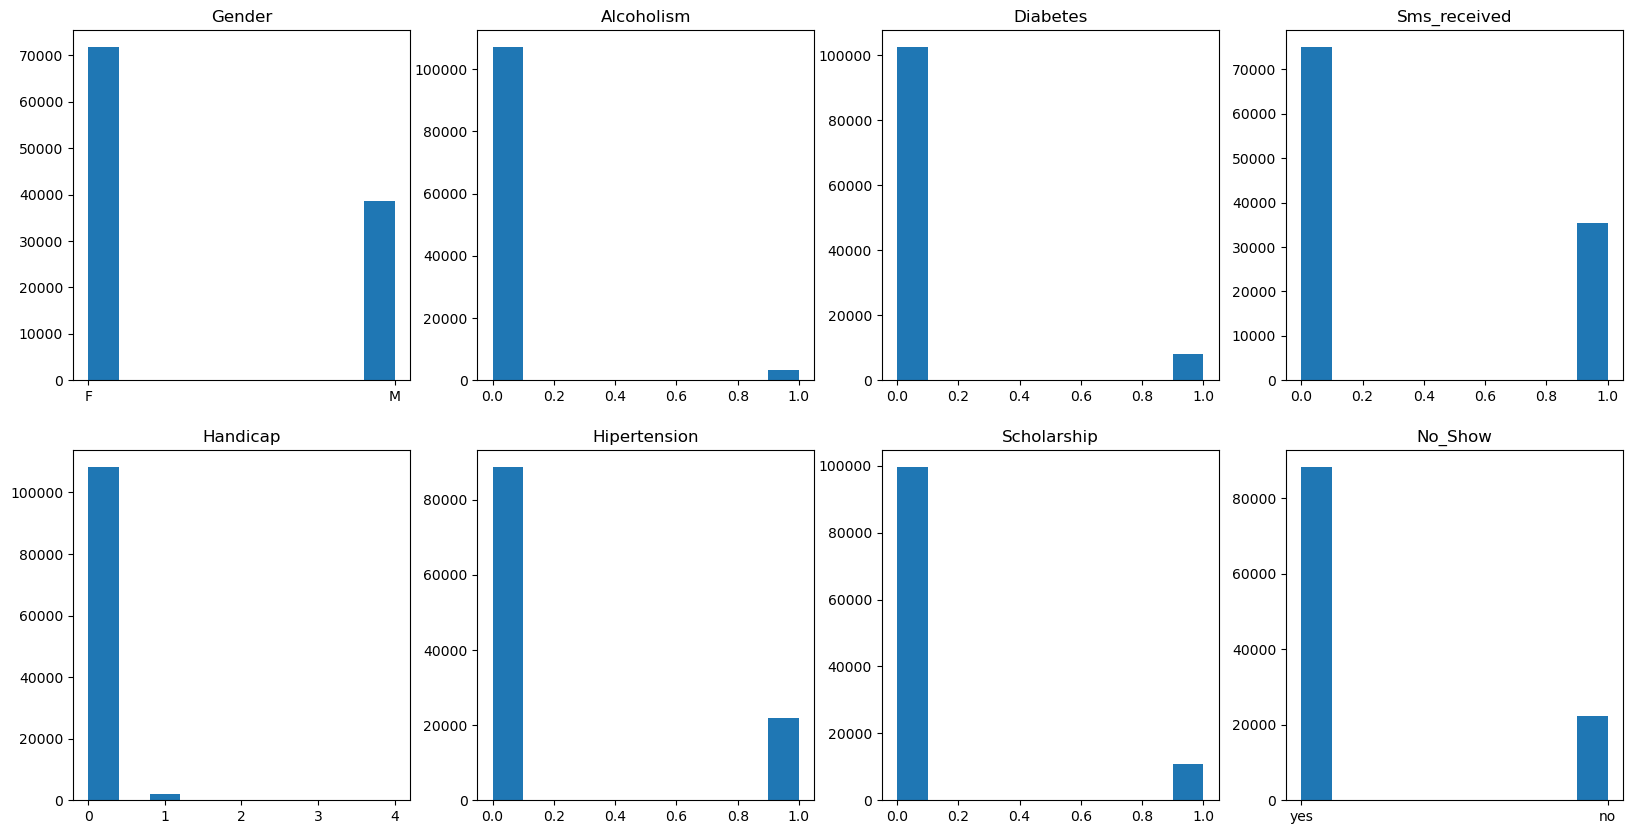

In [16]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
explode = (0.1, 0)

ax[0,0].hist(df.gender)
ax[0,0].set_title('Gender')
ax[1,0].hist(df.handicap)
ax[1,0].set_title('Handicap')
ax[1,1].hist(df.hypertension)
ax[1,1].set_title('Hipertension')
ax[1,2].hist(df.scholarship)
ax[1,2].set_title('Scholarship')
ax[0,1].hist(df.alcoholism)
ax[0,1].set_title('Alcoholism')
ax[0,2].hist(df.diabetes)
ax[0,2].set_title('Diabetes')
ax[0,3].hist(df.sms_received)
ax[0,3].set_title('Sms_received')
ax[1,3].hist(df.no_show)
ax[1,3].set_title('No_Show');

Histograms plots for general characteristics of the 'No-show appointments' dataset. 


In comparison to the histogram plots for the age group less than 1 years of age, it can be deduced that there are a few differences in trends accross all characteristics. 

### Deduction Summary

- Generally, more people showup for their appointments in both data categories.

- Scholarship shows same type of distribution in both groups.

- There are more females than males in the entire dataset as opposed to more males than females in the wrong age category.

- 'alcoholism', 'hypertension','diabetes' and 'handicap' columns recorded in 0 cases for all patients in the wrong-age-entry category while other patients are classified under one or more of these columns in the general dataset.




Deductions based on the comparisons have informed my decision to fill the wrong-age-entry category with the average age accross the original dataset  due to the fact that the both groups largely share same characteristics


In [17]:
#Replacing invalid ages with the mean age value accross the entire dataset.

df['age'].replace({ -1 : df.age.mean(), 0 : df.age.mean()}, inplace = True)

C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\1912874076.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace({ -1 : df.age.mean(), 0 : df.age.mean()}, inplace = True)


All invalid ages are replaced in the cell above and making the changes inplace for the rest of my analysis.

In [18]:
# A good practice is to check if changes have been effected

df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
#checkinng if there are still ages less that 1 remaining in the dataframe

df[(df.age < 1)]['age'].count()

0

Both cells above helps to inform that changes have been successfully effected accross the dataframe

<!-- <a id='eda'></a> -->
## Exploratory Data Analysis

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 


What age ranges are more likely to honor appointments as well as the ages that most likely wouldn't?

- Is attendance a function of age?

In [20]:
#querying two categories from our orginial datasets based on those that honor and did not honor appointments

showup = df.query('no_show == "yes"')
nshowup = df.query('no_show == "no"')


To understand if honoring appointments is a function of age, we need to break down our dataframe in to sections for purpose of analysis. I start by creating a query for all patients that showedup and those that did not showup being the subject of my question.

C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\3608931604.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


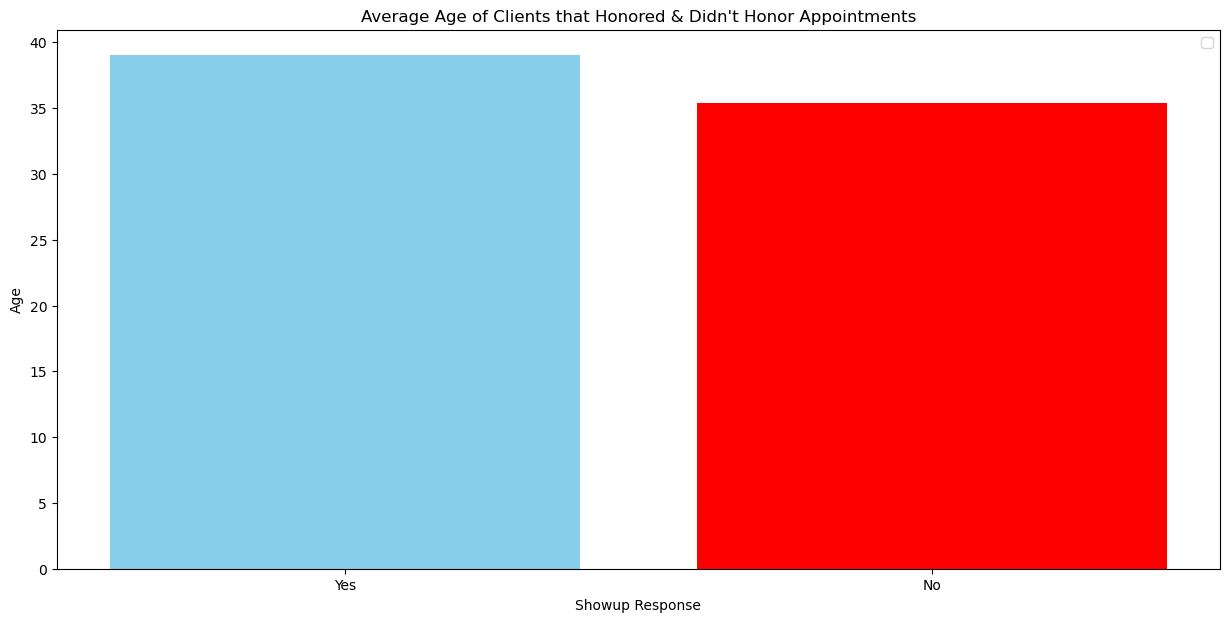

In [21]:
#Plotting statements using matplolib
colors = ['skyblue', 'red']
locations = [1, 2]
height = [showup['age'].mean(), nshowup['age'].mean()]
labels = ['Yes', 'No']
plt.figure(figsize=(15,7))
plt.bar(locations, height , color = colors, tick_label=labels)
plt.legend(loc="upper right")
plt.title("Average Age of Clients that Honored & Didn't Honor Appointments")
plt.xlabel('Showup Response')
plt.ylabel('Age');

Based on the chart above, it shows that slightly older people tend to honor medical appointments more. in order words, the closer and individual gets to age 40(i.e age 36,37,39 etc), the likelier the individual will honor hospital appintments.


It would be interesting to see how this varies amongst genders as I continue my analysis.

In [22]:
#A further breakdown of the query created earlier

showup_f = showup.query('gender == "F"')
nshowup_f = nshowup.query('gender == "F"')
showup_m = showup.query('gender == "M"')
nshowup_m = nshowup.query('gender == "M"')

I am breaking down the first set of queries('showup' and 'nshowup') into subcategories for males and females in order to analyse the distribution of attendance based on average age for the new subcategories.

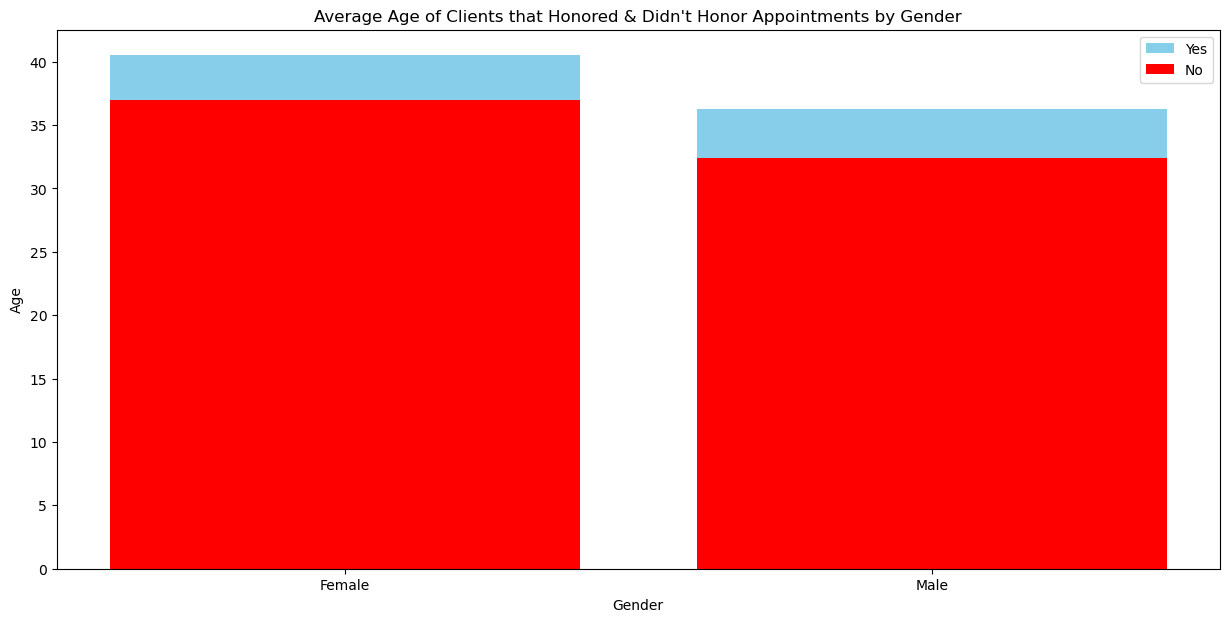

In [23]:
#Plotting statements using matplolib

colors = ['skyblue']
color1 = ['red']
locations = [1, 2]
mean_s = [showup_f.age.mean(), showup_m.age.mean()]
mean_ns = [nshowup_f.age.mean(), nshowup_m.age.mean()]
labels = ['Female', 'Male']
plt.figure(figsize=(15,7))
plt.bar(locations, mean_s, color = colors, tick_label=labels, label="Yes")
plt.bar(locations, mean_ns, color = color1, tick_label=labels, label="No")
plt.legend(loc="upper right")
plt.title("Average Age of Clients that Honored & Didn't Honor Appointments by Gender")
plt.xlabel('Gender')
plt.ylabel('Age');

This communicates more insight on the connection between age and attendance according to  gender. Some key notes include;

1. The female distribution conforms closely with the general trend observed in the previous chart. Average age of females that honor appointments is between 40 and 41, while the average age of females that fail to showup is between age 35 and 36.

2. The male distribution however shows a general attribute of a lesser average age of attendance and non attendance. 

- Do SMS prompts play an important role in appoinment showup rates?

In [24]:
# A look at the number of people that received SMS in showup and noshowup categories

sms_show = showup.query('sms_received == 1')['sms_received'].count()
sms_nshow = nshowup.query('sms_received == 1')['sms_received'].count()

sms_show, sms_nshow

(25698, 9784)

Investigating the influence of SMS prompts require drilling further into the first queries created for our analysis('showup' and 'nshowup'). The cell above contains statements generating the number of people that receives SMS and showedup for their appointments and those that didn't show despite receiving SMS prompts

In [25]:
# A look at the number of people that did not receive SMS in showup and noshowup categories

nsms_show = showup.query('sms_received == 0')['sms_received'].count()
nsms_nshow = nshowup.query('sms_received == 0')['sms_received'].count()

nsms_show, nsms_nshow

(62510, 12535)

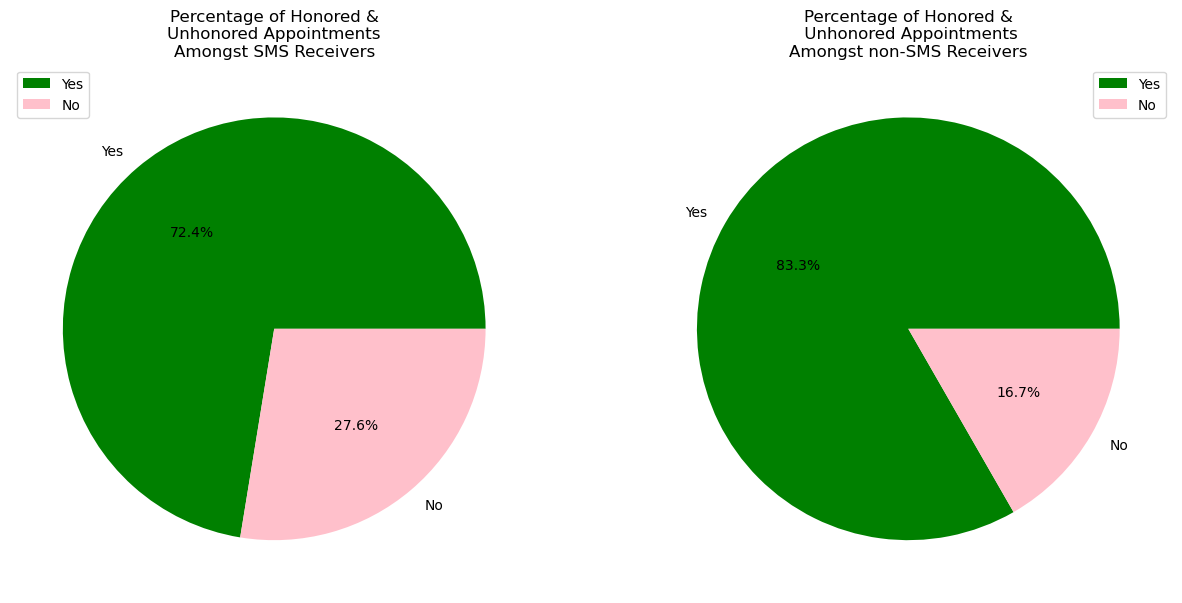

In [26]:
#This section helps to position the plots below side by side as well as the overal size of the plot displayed
fig, ax = plt.subplots(1,2,figsize=(15,7))
explode = (0.1, 0)

#This plot(1) is for the category of people that received SMS prompts
color = ['green','pink']
locations = [1, 2]
show_status = [sms_show, sms_nshow]
labels = ['Yes', 'No']
ax[0].pie(show_status, autopct = '%1.1f%%', labels = labels, colors = color)
ax[0].legend(loc="upper left")
ax[0].set_title("Percentage of Honored &\nUnhonored Appointments\nAmongst SMS Receivers")


#This plot(2) is for the category of people that did not receive SMS prompts 
color = ['green','pink']
locations = [1, 2]
show_status = [nsms_show, nsms_nshow]
labels = ['Yes', 'No']
ax[1].pie(show_status, autopct = '%1.1f%%', labels = labels, colors = color)
ax[1].legend(loc="upper right")
ax[1].set_title("Percentage of Honored &\n Unhonored Appointments\nAmongst non-SMS Receivers");

Clearly, SMS prompts doesn't seem to influence attendance in any way.

1. A large percentage(83.3%) of people that didn't receive SMS prompts honored their appoinments while 16.7% did not.

2. 72.4% of SMS receivers honored their appoinment but this is obviously lesser than the attendees that did not receive any SMS prompts whatsoever. 


- What percentage of males and females are enrolled in welfare programs?

In [27]:
# The following statement groups the dataframe into different gender category and calculates
#the sum of scholarships in each category using integer references from the resulting array.

schshp_f = df.groupby(['gender'])['scholarship'].sum()[0]
schshp_m = df.groupby(['gender'])['scholarship'].sum()[1]

schshp_m, schshp_f

C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\2411563871.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  schshp_f = df.groupby(['gender'])['scholarship'].sum()[0]
C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\2411563871.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  schshp_m = df.groupby(['gender'])['scholarship'].sum()[1]


(2008, 8853)

Exploring the distribution of scholarship enrolments by gender involves cateorising our dataframe into the existing gender distribution and summing up the scholarship values because the data type in the 'scholarship' column is 'int' and it consists of two distinct values(0 and 1).

In [28]:
#All male and female count generated using the gender column and possitional selection for each gender value.

male_count = df.groupby(['gender'])['gender'].count()[1]
female_count = df.groupby(['gender'])['gender'].count()[0]

male_count, female_count

C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\709079853.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_count = df.groupby(['gender'])['gender'].count()[1]
C:\Users\bukun\AppData\Local\Temp\ipykernel_59080\709079853.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_count = df.groupby(['gender'])['gender'].count()[0]


(38687, 71840)

Since I intend to investigate the percentage distribution, the total count for both male and female genders in our dataset needs to be calculated as given above. 

In [29]:
#calculating the difference between males and females enrolled in  welfare programs and those that were not.

schshp_diff_m = male_count - schshp_m
schshp_diff_f = female_count - schshp_f

schshp_diff_m, schshp_diff_f

(36679, 62987)

Investigating using percentage was chosen because the number of females in the distribution far outnumbers the males so plotting aggregates like count may not communicate the exact picture of the welfare enrollment distribution amongst genders.

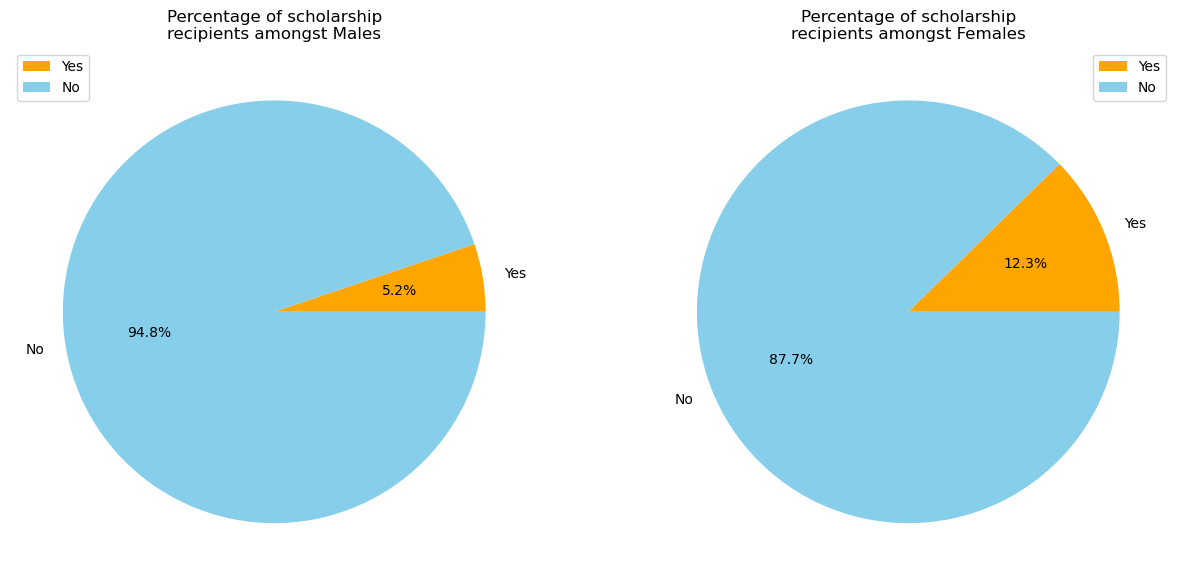

In [30]:
#This section helps to position the plots below side by side as well as the overal size of the plot displayed
fig, ax = plt.subplots(1,2,figsize=(15,7))
explode = (0.1, 0)

#Plot() shows the percentage of schorlasrship recipents amongst males 
color = ['orange','skyblue']
locations = [1, 2]
schship_status = [schshp_m, schshp_diff_m]
labels = ['Yes', 'No']
ax[0].pie(schship_status, autopct = '%1.1f%%', labels = labels, colors = color)
ax[0].legend(loc="upper left")
ax[0].set_title("Percentage of scholarship\nrecipients amongst Males")


#Plot(2) shows the percentage of schorlasrship recipents amongst females 
color = ['orange','skyblue']
locations = [1, 2]
schship_status = [schshp_f, schshp_diff_f]
labels = ['Yes', 'No']
ax[1].pie(schship_status, autopct = '%1.1f%%', labels = labels, colors = color)
ax[1].legend(loc="upper right")
ax[1].set_title("Percentage of scholarship\nrecipients amongst Females");

Some details from the chart include;

1. Females have a higher percentage of enrollment in wellfare programmes than males. More than twice the percentage of enrolled men to be precise. 

2. Only 5.2% of the male distribution are enrolled in welfare programmes. 

<!-- <a id='conclusions'></a> -->
## Conclusions

In conclusion, investigation shows through question one that according to the data provided, people who are middleaged(35 to 41) tend to honors appointments more. Although slightly younger observations were highlighted in the male category. Question two investigated the influence of SMS prompts on attendance of appiontment. Analysis shows that SMS prompts do not neccessarily affect the percentage of people that honored their appointments. Lastly, wellfare enrollment distribution amongst gender was investigated and analysis revealed that a lot lesser percentage of men are enrolled in wellfare programmes as opposed to women. However, there is a generally low enrolment rate for accross the dataset.


## Limitations

Data not capturing other gender identities. Male and females are not the only genders existing now. It would've helped to explore some peculiarities and differences associated with other gender identities.

## References

>**1.** https://matplotlib.org/
>**2.** https://pandas.pydata.org/
>**3.** https://stackoverflow.com/
>**4.** https://datatofish.com/

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295